# Question 1: Sentiment Analysis via the ML-based approach

Download the “Product Sentiment” dataset from the course portal: sentiment_train.csv and sentiment_test.csv.

### Part 1.a. Loading and Prep

Load, clean, and preprocess the data as you find necessary.

In [1]:
import pandas as pd
import seaborn as sns
# TODO: import other libraries as necessary

df_train = pd.read_csv("sentiment_train.csv")

print(df_train.info())
print(df_train.head())

df_test = pd.read_csv("sentiment_test.csv")

print(df_test.info())
print(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
No

In [2]:
import nltk

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\nickl\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_dat

True

In [4]:
df_train.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [6]:
df_train.describe()

,Polarity
count,2400.000000
mean,0.494583
std,0.500075
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df_train.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

<AxesSubplot:>

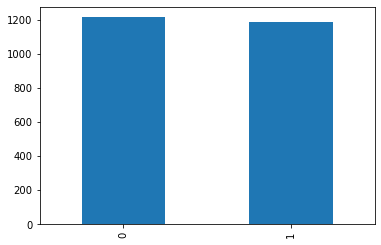

In [8]:
df_train['Polarity'].value_counts().plot.bar()

<AxesSubplot:>

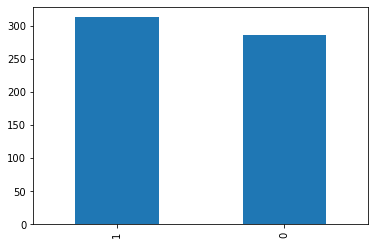

In [9]:
df_test['Polarity'].value_counts().plot.bar()

In [10]:
df_train.groupby('Polarity').describe()

Sentence                                   
            count unique                    top freq
Polarity                                            
0            1213   1206          Does not fit.    2
1            1187   1177  This is a great deal.    2

In [62]:
stop_words = set(stopwords.words('english'))

new_stopwords = ['phone', 'work', 'place', 'service']
new_stopwords_list = stop_words.union(new_stopwords)

not_stopwords = {"no", "nor", "not", "don't", "couldn't", "didn't", "doesn't", "hasn't", "isn't", "shouldn't", "wasn't", "won't", "wouldn't"}
final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])

In [63]:
print(final_stop_words)

{'haven', 'so', 'ain', 'out', 'then', 'its', 'on', "shan't", 'has', 'as', 'aren', 'y', "it's", 'further', 'weren', 'herself', 'we', 'have', 'ourselves', 'a', 'can', 'd', 'an', "weren't", 'them', "you'd", "mightn't", 'this', 'some', 'below', 'why', 'into', "aren't", 'yourselves', 'from', 'now', 'any', 'more', 'place', 'work', 'above', 'all', 'down', 've', 'myself', 'is', 'up', 'she', 'himself', 'where', 'same', 'being', 'most', 'very', 'and', 'by', 'or', 'until', "you're", 's', 'ma', 'own', 'such', 'how', 'whom', 'it', 'off', 'having', 'again', 'been', 'after', 'service', 'they', 'phone', 'the', 'if', 'your', 'yourself', 'there', 'shouldn', 'that', 'don', 'both', 'll', 'at', 'other', 'couldn', 'when', 'o', 'won', "she's", 'here', 'during', 'these', 'were', 'do', 'our', 'are', 'her', 'of', 'should', 'over', 'does', 'me', 'wasn', 'which', 'than', "you'll", 'those', 're', 'yours', 'm', 'once', 'mustn', 'i', 'in', 'he', 'doesn', 'only', 'but', 't', 'themselves', "needn't", 'my', 'before', '

In [11]:
#preprocessing

In [64]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def clean_Review(review_text):
    review_text = re.sub(r'http\S+', '',review_text)
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    review_text = str(review_text).lower()
    review_text = word_tokenize(review_text)
    review_text = [item for item in review_text if item not in final_stop_words]
    review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
    review_text = [i for i in review_text if len(i) > 2]
    review_text = ' '.join(review_text)
    return review_text

df_train['Sentence'] = df_train['Sentence'].apply(clean_Review)
    

In [65]:
df_train.head()

,Sentence,Polarity
0,wow love,1
1,crust good,0
2,tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1


In [66]:
hpol = df_train[df_train.Polarity == 1]['Sentence']
lpol = df_train[df_train.Polarity == 0]['Sentence']

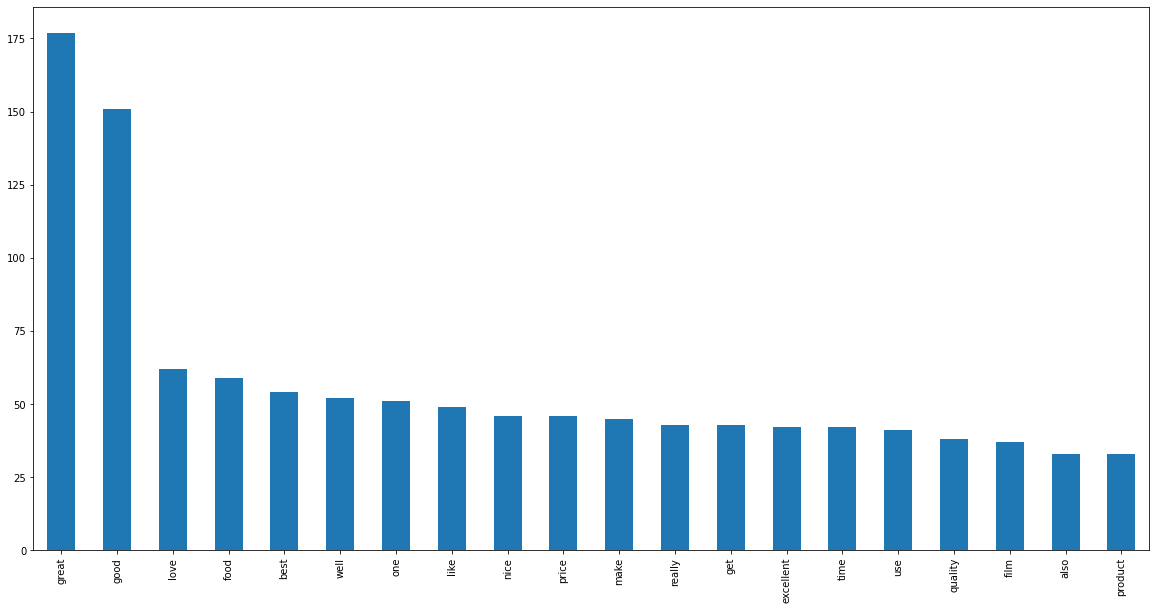

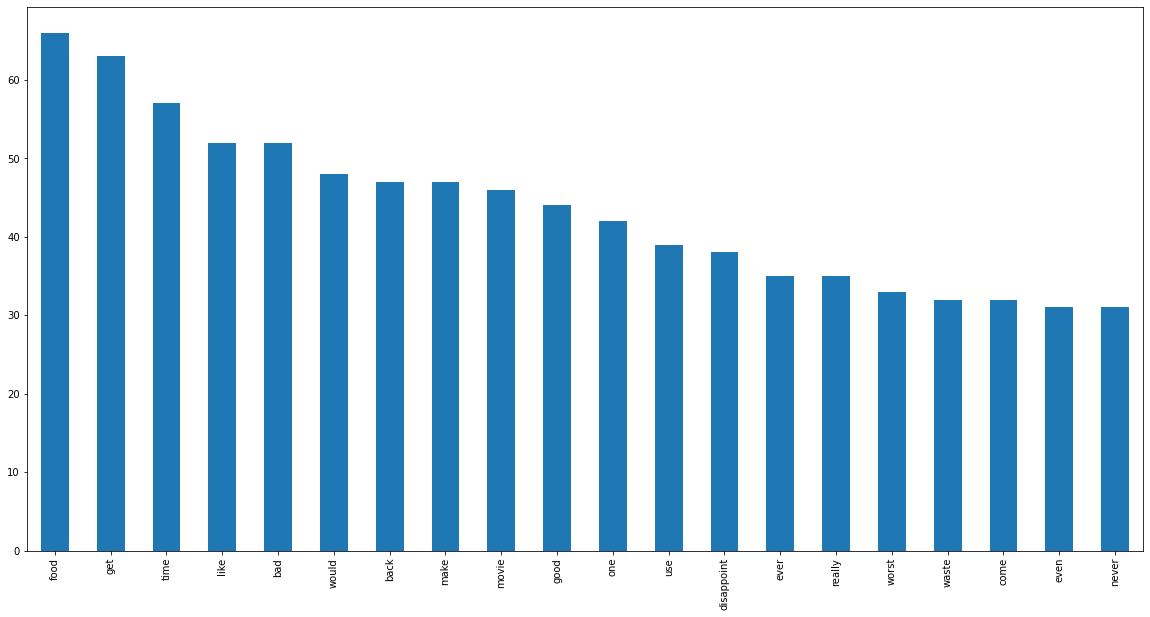

In [67]:
import matplotlib.pyplot as plt 
splitedData = [hpol, lpol]

for item in range(2):
    plt.figure(figsize = (20,10))
    pd.Series('  '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind = 'bar')

In [89]:
stop_words = set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def clean_Review(review_text):
    review_text = re.sub(r'http\S+', '',review_text)
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    review_text = str(review_text).lower()
    review_text = word_tokenize(review_text)
    review_text = [item for item in review_text if item not in final_stop_words]
    review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
    review_text = [i for i in review_text if len(i) > 2]
    review_text = ' '.join(review_text)
    return review_text

df_test['Sentence'] = df_test['Sentence'].apply(clean_Review)

### Part 1.b. Modeling

Use your favorite ML algorithm to train a classification model.  Don’t forget everything that we’ve learned in our ML course: hyperparameter tuning, cross validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing classifier that you can.

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df_train['Sentence']
y = df_train['Polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3, random_state = 42)

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

In [19]:
"""
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape
"""

'\ncv = CountVectorizer()\nX_train_cv = cv.fit_transform(X_train)\nX_train_cv.shape\n'

In [71]:
tfidf = TfidfVectorizer(min_df = 3)
X = tfidf.fit_transform(X_train)
X.shape

(1680, 697)

In [72]:
type(X_train)

pandas.core.series.Series

In [73]:
X_train.head()

1067    feel comfortable headsets wear glass get way s...
792     pay hot dog fry look like come kid meal wiener...
2154                                                 plot
380                                                  back
226                                  unbelievable bargain
Name: Sentence, dtype: object

### Naive Bayes

In [74]:
nb = MultinomialNB()
nb.fit(X, y_train)

X_test_cv = tfidf.transform(X_test)

predictions = nb.predict(X_test_cv)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       378
           1       0.73      0.83      0.78       342

    accuracy                           0.77       720
   macro avg       0.78      0.78      0.77       720
weighted avg       0.78      0.77      0.77       720



In [75]:
#Gridsearch Cross Validation

model = MultinomialNB()
alpha = [0.01, 0.1, 0.5, 1.0, 10]
grid = dict(alpha=alpha)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring = 'f1')   
grid_result = grid_search.fit(X, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.788933 using {'alpha': 1.0}


In [76]:
nb = MultinomialNB(alpha=1.0)
nb.fit(X, y_train)

X_test_cv = tfidf.transform(X_test)

predictions = nb.predict(X_test_cv)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       378
           1       0.73      0.83      0.78       342

    accuracy                           0.77       720
   macro avg       0.78      0.78      0.77       720
weighted avg       0.78      0.77      0.77       720



### SGD Classifier

In [77]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X, y_train)

X_test_cv = tfidf.transform(X_test)

predictions = sgd.predict(X_test_cv)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       378
           1       0.75      0.73      0.74       342

    accuracy                           0.76       720
   macro avg       0.76      0.75      0.75       720
weighted avg       0.76      0.76      0.76       720



In [78]:
#Gridsearch Cross Validation

model = SGDClassifier()
loss = ['hinge', 'log', 'squared_hinge', 'modified_huber']
penalty = ['l2', 'l1', 'none']
alpha = [0.1,0.01,0.001,0.0001]
grid = dict(loss=loss, penalty=penalty, alpha=alpha)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring = 'f1')   
grid_result = grid_search.fit(X, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.778055 using {'alpha': 0.001, 'loss': 'log', 'penalty': 'none'}


In [79]:
sgd = SGDClassifier(alpha=0.001, loss='log', penalty='none')
sgd.fit(X, y_train)

X_test_cv = tfidf.transform(X_test)

predictions = sgd.predict(X_test_cv)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       378
           1       0.78      0.78      0.78       342

    accuracy                           0.79       720
   macro avg       0.79      0.79      0.79       720
weighted avg       0.79      0.79      0.79       720



### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y_train)

X_test_cv = tfidf.transform(X_test)

predictions = lr.predict(X_test_cv)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       378
           1       0.79      0.78      0.79       342

    accuracy                           0.80       720
   macro avg       0.80      0.80      0.80       720
weighted avg       0.80      0.80      0.80       720



In [81]:
#Gridsearch Cross Validation

model = LogisticRegression()
solvers = ['lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100,10,1,0.1,0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring = 'f1')   
grid_result = grid_search.fit(X, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.775800 using {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [82]:
lr = LogisticRegression(C=1, penalty = 'l2', solver='lbfgs')
lr.fit(X, y_train)

X_test_cv = tfidf.transform(X_test)

predictions = lr.predict(X_test_cv)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       378
           1       0.79      0.78      0.79       342

    accuracy                           0.80       720
   macro avg       0.80      0.80      0.80       720
weighted avg       0.80      0.80      0.80       720



### Part 1.c. Assessing

Use the testing data to measure the accuracy and F1-score of your model.  

In [91]:
X_TEST = df_test['Sentence']
Y_TEST = df_test['Polarity']

In [92]:
X_TEST.head()

0    good commentary today love undoubtedly film wo...
1    people first timers film make think excellent job
2    popular cinema good house good reactions plent...
3                      feel good film felt come cinema
4         northern humour positive community represent
Name: Sentence, dtype: object

In [93]:
type(X_TEST)

pandas.core.series.Series

In [94]:
Y_TEST.head()

0    1
1    1
2    1
3    1
4    1
Name: Polarity, dtype: int64

In [95]:
Y_TEST.shape

(600,)

In [96]:
tfidf = TfidfVectorizer(vocabulary=tfidf.vocabulary_, min_df = 3)
X2 = tfidf.fit_transform(X_TEST)
X2.shape

(600, 697)

In [97]:
type(X_TEST)

pandas.core.series.Series

### Naive Bayes

In [98]:
nb = MultinomialNB(alpha=1.0)
nb.fit(X, y_train)

X_test_cv = tfidf.transform(X_TEST)

predictions = nb.predict(X_test_cv)

print(metrics.classification_report(Y_TEST, predictions))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       287
           1       0.78      0.70      0.73       313

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600



### SGD

In [99]:
sgd = SGDClassifier(alpha=0.001, loss='log', penalty='none')
sgd.fit(X, y_train)

X_test_cv = tfidf.transform(X_TEST)

predictions = sgd.predict(X_test_cv)

print(metrics.classification_report(Y_TEST, predictions))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       287
           1       0.78      0.66      0.71       313

    accuracy                           0.72       600
   macro avg       0.73      0.73      0.72       600
weighted avg       0.73      0.72      0.72       600



### Logistic Regression

In [100]:
lr = LogisticRegression(C=1, penalty = 'l2', solver='lbfgs')
lr.fit(X, y_train)

X_test_cv = tfidf.transform(X_TEST)

predictions = lr.predict(X_test_cv)

print(metrics.classification_report(Y_TEST, predictions))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       287
           1       0.80      0.62      0.70       313

    accuracy                           0.72       600
   macro avg       0.73      0.73      0.72       600
weighted avg       0.74      0.72      0.72       600



### Part 2. Given the accuracy and F1-score of your model, are you satisfied with the results, from a business point of view? Explain.

Naive Bayes:
    Accuracy: 0.76
    f1 score: 0.75

Stochastic Gradient Descent:
    Accuracy: 0.74
    f1 score: 0.73
    
Logistic Regression: 
    Accuracy: 0.74
    f1 score: 0.72
    
When comparing the f1 scores of the Multinomial Naive Bayes, Stochastic Gradient Descent, and Logistic Regression, the Multinomial Naive Bayes had an overall better score with 0.75 with a recall score of 0.71. The f1 scores of each model was relatively close, acting as a good measure that we're in the right ballpark, with NB being the best. Personally, I am content with this outcome. From the business perspective, this means that 75% of the time the model reads in a new review, it'll correctly categorize the polarity.  

### Part 3. Show five example instances in which your model’s predictions were incorrect. Describe why you think the model was wrong. Don’t just guess: dig deep to figure out the root cause.

In [42]:
predictzzz = nb.predict(X_test_cv)
df_test['prediction'] = predictzzz

In [43]:
wrong = df_test.loc[df_test['Polarity'] != df_test['prediction']]
wrong.head(50)

,Sentence,Polarity,prediction
3,feel good film felt come cinema,1,0
5,rather enjoy,1,0
6,like,1,0
14,would cast role ready script,1,0
20,blow,0,1
26,wish could enter negative value admins,0,1
34,set,0,1
36,soundtrack terrible either,1,0
38,still set get big vey scale,1,0
39,yes simplify things sake brevity really core p...,0,1


In [44]:
wrong.tail(50)

,Sentence,Polarity,prediction
422,long time since entertain movie,1,0
423,struggle find anything bad say,1,0
426,film deserve strong kudos take stand exception...,1,0
428,juano hernandez exceptional actor play support...,1,0
431,see film,1,0
432,year however remind huston still top game evin...,1,0
433,feel thoughts gabriel discomfort dance intangi...,1,0
442,movie possibly one creative work horror ever,1,0
445,call nut think one best movies ever,1,0
453,everything stink,0,1


In [45]:
wrong.count()

Sentence      159
Polarity      159
prediction    159
dtype: int64

To answer this question, a new dataframe was created of the df_test set with the appended prediction column. The results were then filtered to only include the predictions that were wrong. In total, there were 145 wrong predictions. After investigating the dataframe, here are some assumptions as to why the best performing model predicted the results wrong. 

Assumption #1: Baseline stopwords include some regularly used NEGATIVE words. For example, "no", "nor", "not", "don't", "couldn't", "didn't", "doesn't", "hasn't", "isn't", "shouldn't", "wasn't", "won't", "wouldn't" are all listed in the nltk stopwords.words. These words hold negative polarity and if it were included in the weightings of the tfidf, some of the comments that used these words would've have been easily predicted as 0's. 

During the initial runthrough, the stopwords were used as a blanket-list of words to remove. As can be seen from many of the reviews having 1 or 2 words. The context of these reviews could go either way, 1 or 0 polarity. Look at entry #6 - "like" was predicted as a 0 but in actuality, was a 1. Therefore, careful consideration should be used for out-of-the-box solutions and one of those issues is present here. If we included the above stopwords, it is highly likely that the f1 scores for all models would improve as well. 

In [46]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Instance #2: Idioms, sarcasm, or expressions are difficult for computers to detech with code.  

Idiom: 423 - "struggle find anything bad say." Not quite sure if this is a proper example of an idiom, rather a use of double negatives to connotate a positive sentiment. Double negative words such as "struggle" and "bad" have a compounding negative effect on sentiment while when used in normal speak, the sentiment gets cancelled, therefore coming across as positive.  

Expression: 208 - "accent absolutely abysmal." Given how the NB model and TF-IDF vectorizor function, I would assume that the adjective "absolutely" is often used in a positive context and outweighing the negativity of the word "abysmal."

Sarcasm: 179 - "budget evidently limited." The context can be read between the lines saying that the budget was VERY low and therefore, very low quality. However, no individual word in this comment can be heavily weighted as a negative polarity. 

Instance #3: This may be more of a mis-step in the cleaning process, but as I was going through the 